<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Supervised_learning_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.1 MB/s eta 0:00:00


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_edited.csv")
print(dataset.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0      yes_es       yes_ec           no_em  
1      yes_es       yes_ec           no_em  
2      yes_es       yes_ec          yes_em  
3      yes_es        no_ec          yes_em  
4      yes_es        no_ec          yes_em  


In [3]:
columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
dataset = pd.concat([dataset]+[pd.get_dummies(dataset[i],drop_first=True) for i in columns],axis=1)
dataset.drop(columns,axis=1,inplace=True)
dataset.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes_es,yes_ec,yes_em
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [4]:
#predicting the company name based on certain features
y = dataset['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [5]:
#dropped the features that are probably not relevant to the model
X = dataset.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

In [6]:
#do testing/training split - need different code for own data b/c no .data or .target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [7]:
X_train.shape

(96, 40)

In [8]:
X_test.shape

(33, 40)

In [9]:
y_train.shape

(96,)

In [10]:
y_test.shape

(33,)

# k-Nearest Neighbors

### Import and instantiate the class - set paraneter of # neighbors

In [11]:
#import and instantiate the class - set paraneter of # neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)

### Fit classifier using training set

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Call the predict() method to make predictions on test data - will compute closest neighboro in training set

In [13]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: ['C' 'C' 'A' 'C' 'B' 'A' 'B' 'C' 'E' 'A' 'A' 'C' 'C' 'B' 'B' 'B' 'C' 'B'
 'A' 'A' 'C' 'A' 'B' 'E' 'C' 'E' 'B' 'C' 'B' 'A' 'B' 'B' 'A']


Use score() method to evaluate how well model generalizes

In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.45


**Model is 45% accurate = correctly predicted the class for 45% of the samples in test dataset**

> Add blockquote



In [15]:
print("Training set accuracy: {:.2f}".format(clf.score(X_train, y_train)))

Training set accuracy: 0.60


**Model is 60% accurate = correctly predicted the class for 60% of the samples in the training dataset**

## Analyzing kNeighbors Classifier

In [16]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# for n_neighbors, ax in zip([1, 3, 9], axes):
#     # fit the model
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
#     mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
#     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
#     ax.set_title("{} neighbor(s)".format(n_neighbors))
#     ax.set_xlabel("feature 0")
#     ax.set_ylabel("feature 1")
# axes[0].legend(loc=3)

# Breast cancer dataset

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys()) # Print the keys available in the cancer dictionary
print(cancer['DESCR']) # Access and print the description of the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

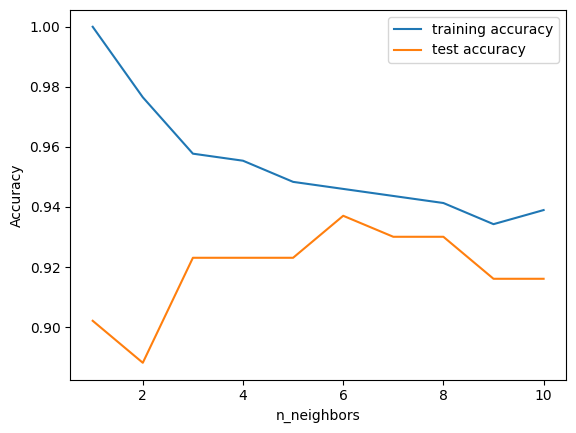

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # build model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [19]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# for n_neighbors, ax in zip([1, 3, 9], axes):
#   # the fit method returns object self, so we can instantiate
#   # and fit in one line
#   clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
#   mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
#   mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
#   ax.set_title("{} neighbor(s)".format(n_neighbors))
#   ax.set_xlabel("feature 0")
#   ax.set_ylabel("feature 1")
# axes[0].legend(loc=3)

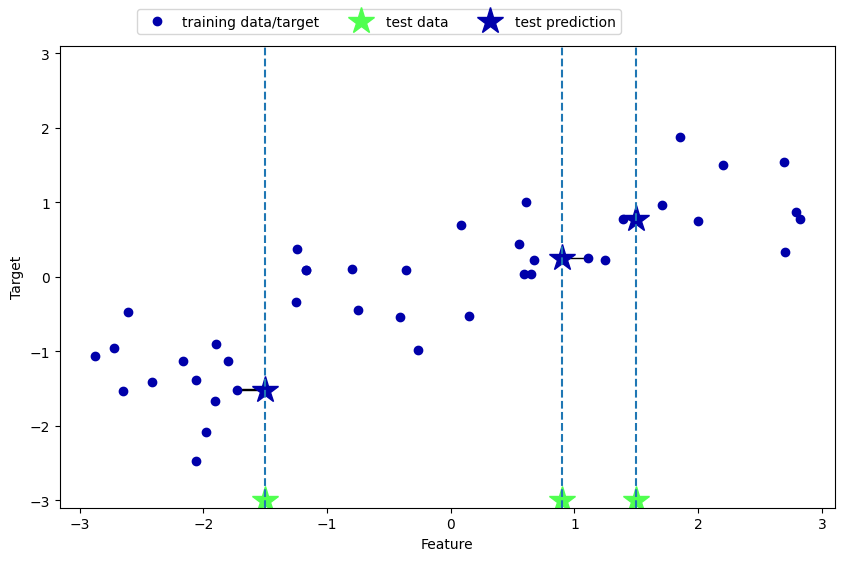

In [20]:
#k-neighbors regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

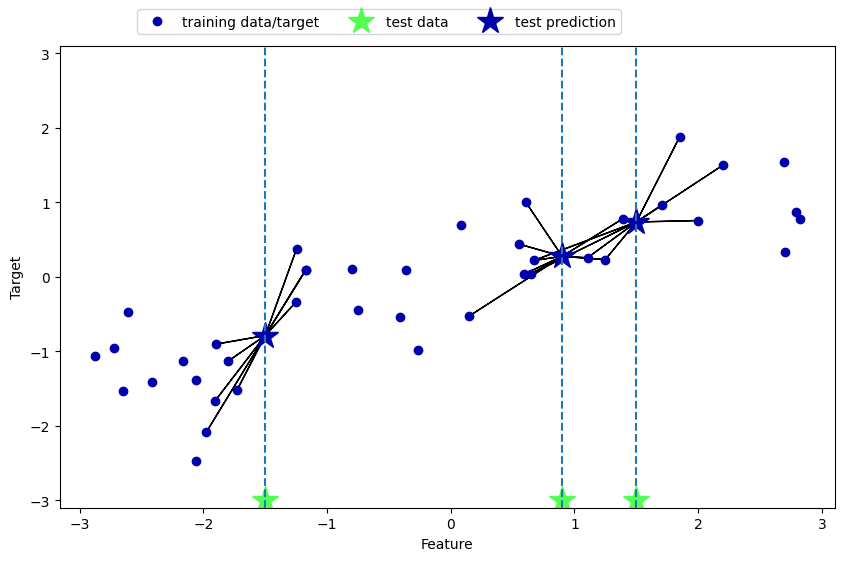

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[ 0.42999717 -0.05396539 -0.12350225  0.16941863 -0.08973653 -0.8301424
 -1.62784743 -0.09712694  0.16941863 -1.62784743]


In [24]:

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.74


Socre of 0.74 is a decent model fit

## Analyze kNeighbors Regressor

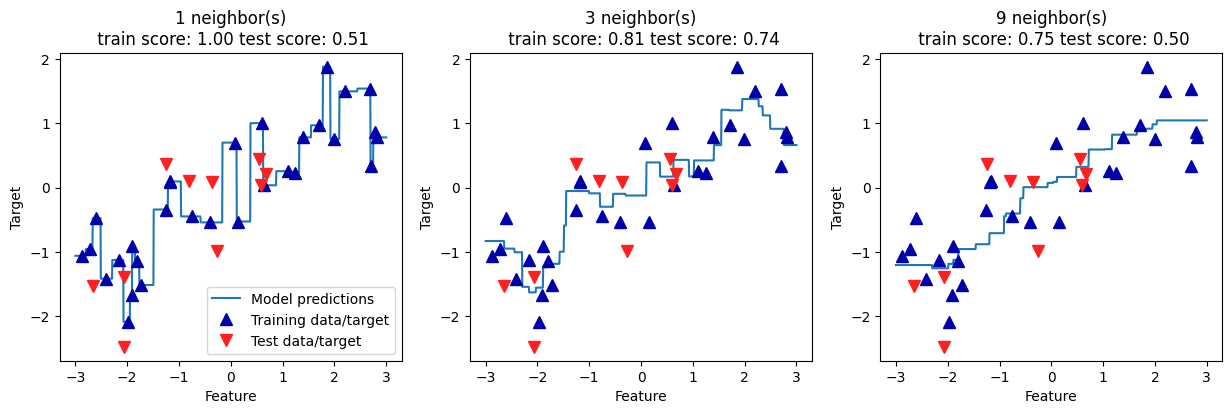

In [25]:
from os import linesep
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced b/w -3 & 3
line= np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes): #1,3,9 = diff neighbor parameters
  #make predictions using 1, 3, or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
      n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

# Linear models


w[0]: 0.393906  b: -0.031804


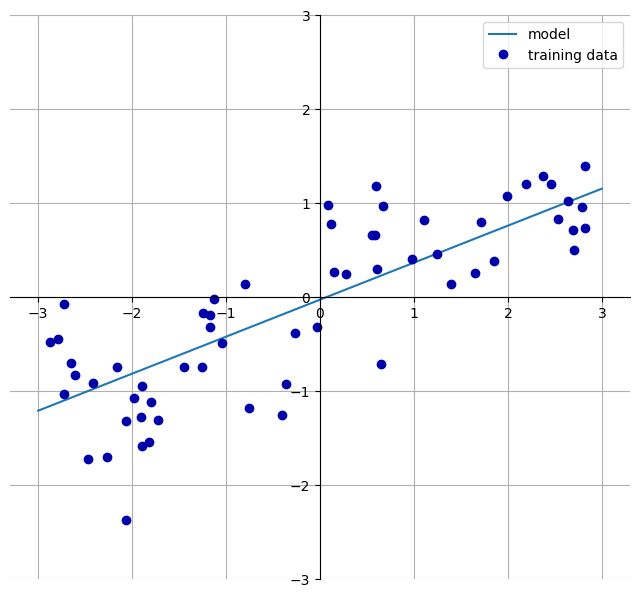

In [26]:
mglearn.plots.plot_linear_regression_wave()

Linear regression aka ordinary least squares

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [28]:
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test, y_test)))

Training set score: 0.670089
Test set score: 0.659337


## While R^2 of 0.66 is not good, the fact that the training and testing scores are close together means that we are more likely underfitting the data instead of overfitting it.

In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Model correctly predicted the class for 95% of the samples in the training set.
Model correctly predicted the class for 61% of the samples in the testing set.

Problem is that this is the large discrepancy b/w training/testing is because of overfitting.


Alternative to linear regression = ridge regression
# **Ridge regression**
## Similar to linear reg but coeff predict well on training data AND uses regularization (when coeff are as small as possible - close to 0)
## Regularization stops a model from overfitting.

In [31]:
#import Ridge from sklearn
from sklearn.linear_model import Ridge
#alpha default to 1.0
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Model correctly predicts the class of 89% of samples in training set and 75% of samples in testing set.

*   Training set score decreases & testing score increases
*   Ridge = less complex model that yields worse performance on trainig set but better performance on testing = better generalization.

# **Choose the Ridge Regression over the linear regression b/c the goal is to get the highest generalization**



Ridge regression makes tradeoff b/w model simplicity and training set performance.

Alpha parameter (default = 1.0) determines emphasis on simplicity vs training set. Best alpha based on dataset.
## **Increasing alpha pushes coefficients to 0 = decreases training set performance**

In [32]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #alpha=10
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [33]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge8 = Ridge(alpha=8).fit(X_train, y_train) #alpha=8
print("Training set score: {:.2f}".format(ridge8.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge8.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.65


In [34]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge25 = Ridge(alpha=25).fit(X_train, y_train) #alpha=25
print("Training set score: {:.2f}".format(ridge25.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge25.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.56


In [35]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge2 = Ridge(alpha=2).fit(X_train, y_train) #alpha=2
print("Training set score: {:.2f}".format(ridge2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge2.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.73


In [36]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) #alpha=0.1
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


## With a very small alpha of 0.1, coefficients are not restricted and results are similar to linear regression

Model correctly predicts class of 93% of samples in training set and 77% of samples in testing set.

## Plot different alpha parameters effect on model.

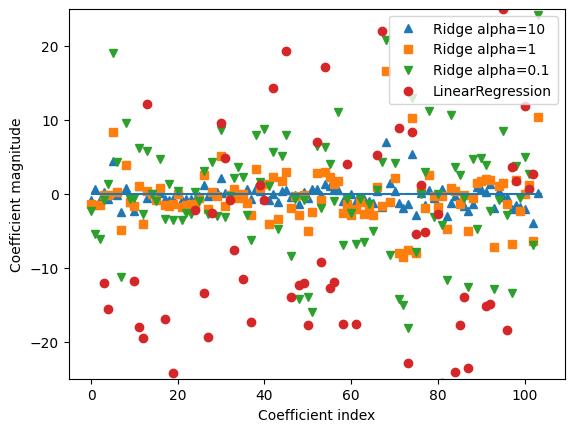

In [37]:
#plot how different alpha parameter changes model
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

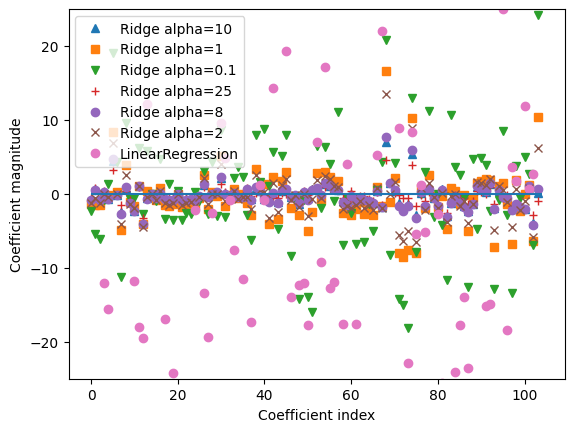

In [38]:
#PLOT ALL THE DIFFERENT ALPHA PARAMETERS
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge25.coef_, '+', label="Ridge alpha=25")
plt.plot(ridge8.coef_, 'o', label="Ridge alpha=8")
plt.plot(ridge2.coef_, 'x', label="Ridge alpha=2")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

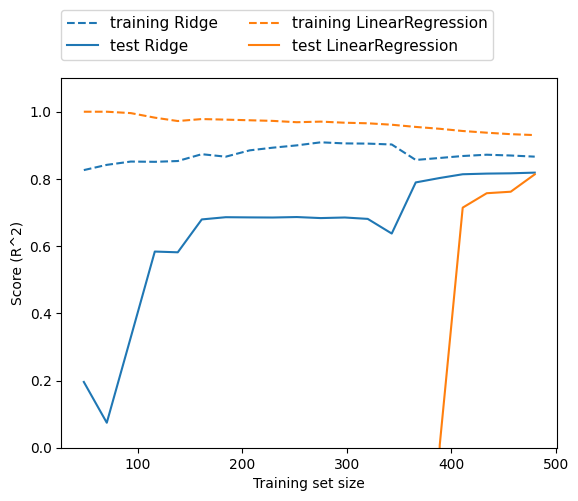

In [39]:
mglearn.plots.plot_ridge_n_samples()


*   Training score higer than test score overall
*   Ridge training score lower than lr training score b/c of regularization
*   Ridge test better for smaller subsets
*   For < 400 data pts, lr doesn't work - won't learn anything

## **Regularization is less important when there is a lot of training data & linear/ridge will perform the same. If more data added = harder to overfit model**





# **Lasso**
## Alternative to linear & ridge
*   Restricts coeff to 0 using L1 regularization
*   **L1 regularization = some coef=0, means it ignores some features = *automatic feature selection***
*   Model is easier to interpret
*   Reveals important features in model





In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Model does not perform well. It correctly predicts the class of 29% of the samples in training set and 21% of samples in testing set.

Only uses 4 out of 105 features

### **Lasso can be altered by parameter, alpha**

In [41]:
#CHANGE ALPHA PARAMETER TO 0.01
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) #alpha=0.01
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Model correctly predicts class of 90% of the samples in training set and 77% of samples in test set.

*   Smaller alpha = fit more complex model and performs better.
*   *But if alpha too low = removes regularization = overfits and results are similar to linear regression.*




## **Performs better than Ridge & uses 33/105 features - easier to understand.**

In [42]:
#CHANGE ALPHA PARAMETER TO 0.5
lasso05 = Lasso(alpha=0.5, max_iter=100000).fit(X_train, y_train) #alpha=0.5
print("Training set score: {:.2f}".format(lasso05.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso05.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso05.coef_ != 0)))

Training set score: 0.61
Test set score: 0.50
Number of features used: 6


Model correctly predicts class for 61% of training set and 50% of testing set and uses 6/105 features.

In [43]:
#CHANGE ALPHA PARAMETER TO 0.25
lasso025 = Lasso(alpha=0.25, max_iter=100000).fit(X_train, y_train) #alpha=0.25
print("Training set score: {:.2f}".format(lasso025.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso025.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso025.coef_ != 0)))

Training set score: 0.72
Test set score: 0.59
Number of features used: 7


Model correctly predicts class for 72% of training set and 59% of testing set and uses 7/105 features.

In [44]:
#CHANGE ALPHA PARAMETER TO 0.1
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train) #alpha=0.1
print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.77
Test set score: 0.63
Number of features used: 8


Model correctly predicts class for 77% of training set and 63% of testing set and uses 8/105 features.

In [45]:
#CHANGE ALPHA PARAMETER TO 0.05
lasso005 = Lasso(alpha=0.05, max_iter=100000).fit(X_train, y_train) #alpha=0.05
print("Training set score: {:.2f}".format(lasso005.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso005.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso005.coef_ != 0)))

Training set score: 0.83
Test set score: 0.69
Number of features used: 18


Model correctly predicts class for 83% of training set and 69% of testing set and uses 18/105 features.

In [46]:
#CHANGE ALPHA PARAMETER TO 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) #alpha=0.0001
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Model correctly predicts class for 95% of training set and 64% of testing set and uses 96/105 features.

## Plot coefficients of different models

Text(0, 0.5, 'Coefficient magnitude')

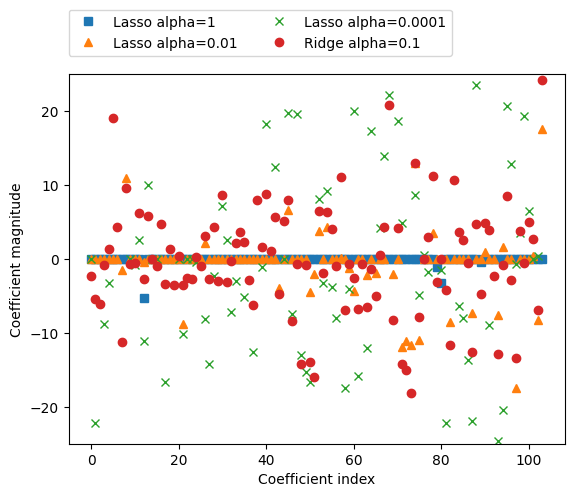

In [47]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'x', label="Lasso alpha=0.0001")


plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### Summary
### At alpha=1 - most coef=0 & rest are very small
### At alpha=0.01 - most features = 0
### At alpha=0.0001 - unregularized model w/ big coefs and non-zeros

Text(0, 0.5, 'Coefficient magnitude')

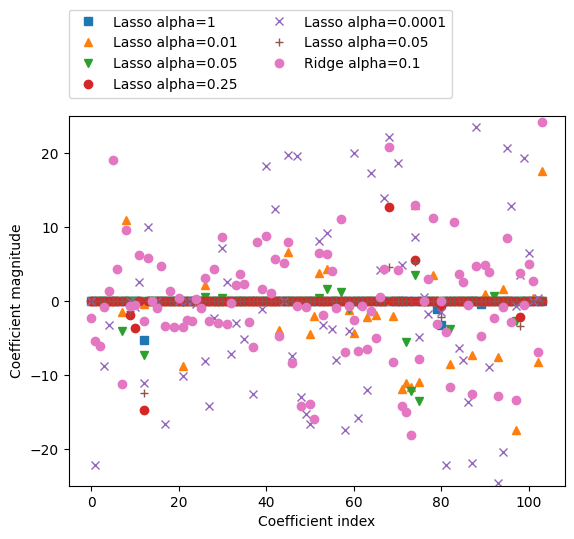

In [48]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso005.coef_, 'v', label="Lasso alpha=0.05")
plt.plot(lasso025.coef_, 'o', label="Lasso alpha=0.25")
plt.plot(lasso00001.coef_, 'x', label="Lasso alpha=0.0001")
plt.plot(lasso05.coef_, '+', label="Lasso alpha=0.05")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear modesls for classification
*   If function < 0, predict class -1.
*   If function > 0, predict class +1
*   Linear (binary) classifier separates 2 classes w/ line, plane or hyperplane
*   Algorithms for learning models differ in 2 ways: (1) how thye meausre how well combo of coefficients & intercept fits training data & (2) regularization
*   Diff algo choose diff ways to measure what fitting training set well means
*   2 most common linear classification algo = logistic regression & linear support vector machines (linear SVMs)
*   Logistic regression = classification algo NOT regression algo. Don't confuse w/ lin reg




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


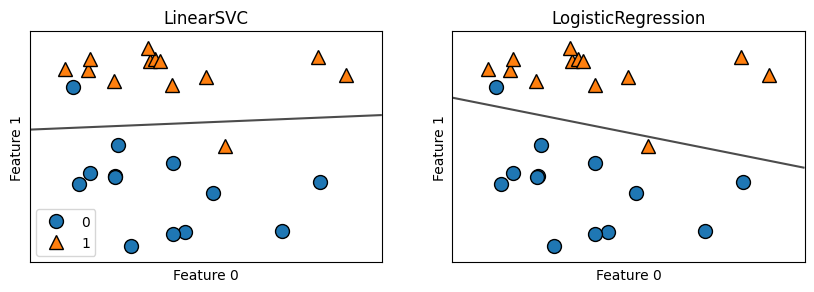

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#use the forge dataset
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0") #put 1st feature on x-axis
  ax.set_ylabel("Feature 1") #put 2nd feature on y-axis
  axes[0].legend()




*   X-axis = 1st feat, y-axis = 2nd feat
*   Decision boundary = straight line
*   Both models misclassify 2 points
*   Both apply L2 regularization sim to Ridge
###   **Adjustable parameter is C and determines strength of regularization**
###    **Higher C = less regularization**
*   High C tries to fit training data, low C pushes coefs to 0
*   List item











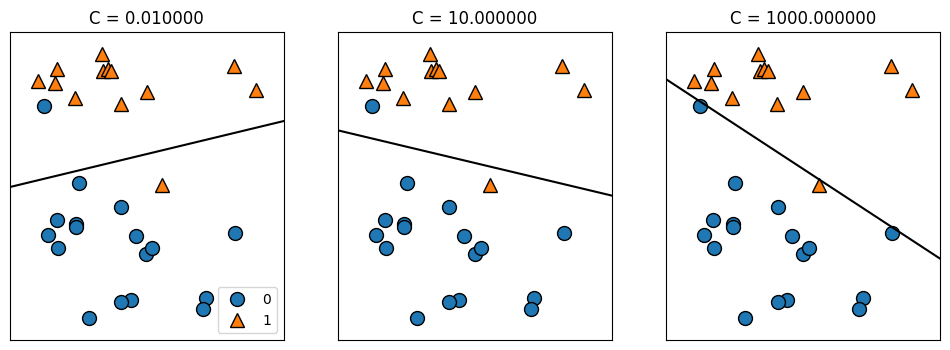

In [50]:
mglearn.plots.plot_linear_svc_regularization()

### Left model
*   small C = lots of regularization
*   all but 1 class 0 pts at bottom & all but 1 class 1 pts at top
*   decision boundary = relative horizontal line

### Center model
*   Tilts decision boundary b/c higher C
*   Focuses on the 2 misclassified points


### Right model
*   Tilts decision boundary
*   Correctly classifies all pts in class 0
*   Focuses on trying to classify all the points = overfitting


## In high dimensions, linear models for classification are powerful and stopping overfitting is important when considering more features.






In [51]:
#DEFAULT C=1

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 95% of samples in training set and 96% of samples in testing set.

## **B/c training/tesing scores are so close = underfitting**

In [52]:
#CHANGE C TO 10
logreg10 = LogisticRegression(C=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 96% of samples in training set and 96% of samples in testing set.

Underfitting

In [53]:
#CHANGE C TO 50
logreg50 = LogisticRegression(C=50).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg50.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg50.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 94% of samples in training set and 96% of samples in testing set.

In [54]:
#CHANGE C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) #C=100
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 94% of samples in training set and 96% of samples in testing set.

In [55]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) #C=0.01
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 93% of samples in training set and 93% of samples in testing set.

## **Training & test set accuracy drops relative to default parameters**

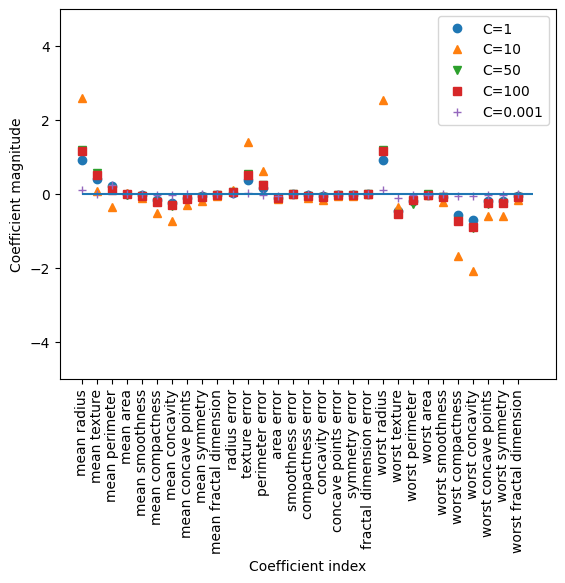

In [56]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=10")
plt.plot(logreg50.coef_.T, 'v', label="C=50")
plt.plot(logreg100.coef_.T, 's', label="C=100")
plt.plot(logreg001.coef_.T, '+', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Logisitic regression uses L2 regularization = results similar to Ridge

Stronger regularization pushes coefficients toward 0 but never actually will equal 0

For C=100 & C=1 - negative coefficients. C=0.001 had positive coefficient

Change of sign is due to mean perimeter - high mean perimeter could indicate benign or malignant

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


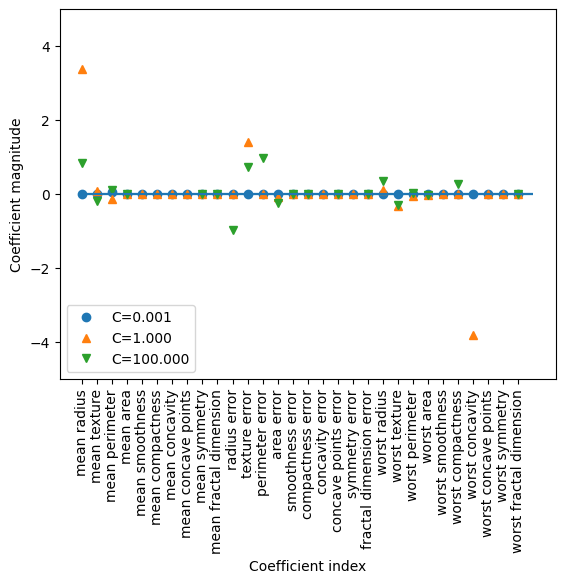

In [57]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1").fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

  plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
  plt.hlines(0, 0, cancer.data.shape[1])
  plt.ylim(-5, 5)
  plt.xlabel("Coefficient index")
  plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### **Difference between linear models for binary classification & linear models for regression**

- Penalty parameter - influences regularization & whether model will use all available features or use a subset



# Linear models for multiclass classification

*   Most linear classification models are only for binary classification and don't apply to multiclass, EXCEPT log reg
*   **One vs rest approach** - way to extend bin classific algo to multiclass classif algo

## **One-vs-rest approach**
*   binary model is learned for each class that tries to separate that class from the other classes = same # binary models as classes
*   Binary classifiers run on test pt - Highest score classifier on its single class wins & that's the class used for prediction








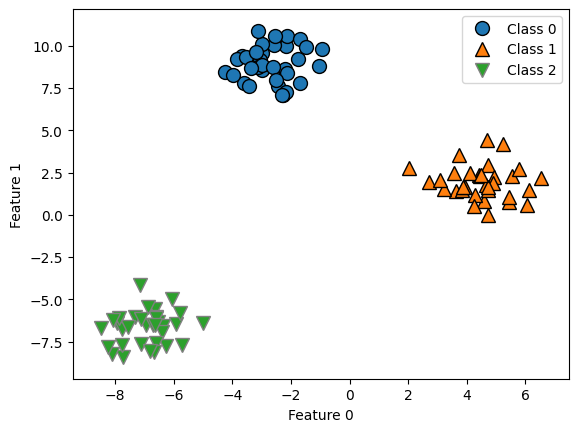

In [58]:
#2D toy dataset w/ 3 class classification

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

### Train a LinearSVC classifier on this dataset

In [59]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shpae: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shpae:  (3,)


Shape of (3,2) = each row of coef_ has coeff vector for 1/3 classes & each col has coef value for specific feature.

Intercept_ is 1D array that stores intercepts for each class

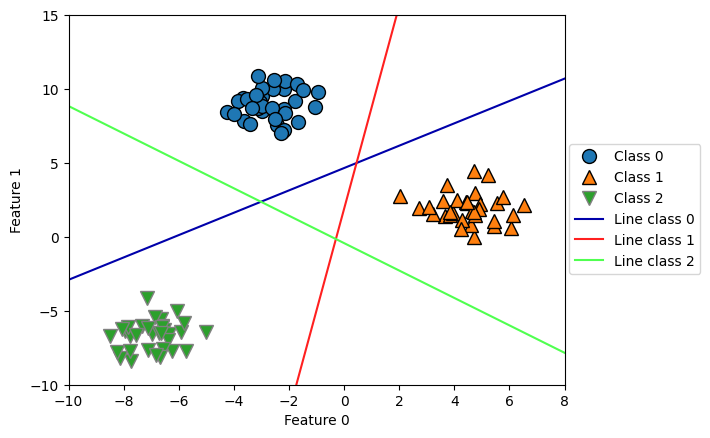

In [60]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

**Summary**
*   Pts in class 0 training data are above class 0 line = **on the class 0 side of this binary classifier**
*   Class 0 pts are above class 2 line & to left of class 1 line = classified as "*rest*" by the binary classifier
- Any pt will be labeled as class 0 by final classifier


**What about triangle in middle?**
- All 3 binary classifiers will label pts as "*rest*" in this triangle area

**What class would  a point in triangle be assigned to?**
- class of closest line = highest value for classification formula



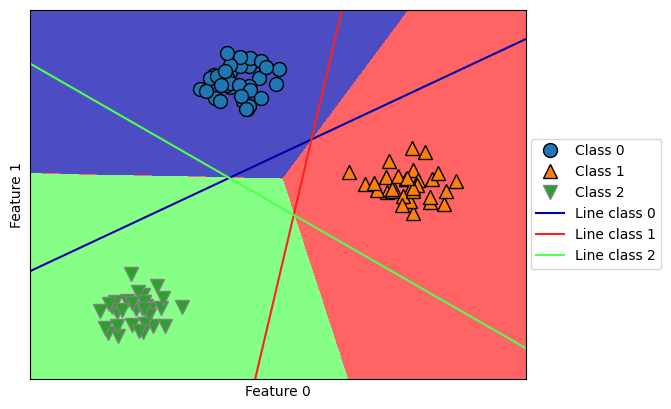

In [61]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
  plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
              'Line class 2'], loc=(1.01, 0.3))
  plt.xlabel("Feature 0")
  plt.ylabel("Feature 1")

## **Strengths, weaknesses, and parameters**
- Main parameter of linear models = regularization parameter
-- alpha for regression models
-- C in LinearSVC & Log reg

### **Big alpha & small C = simple models**

- C & alpha used on log scale

### L1 or L2 regularization
- L1 if only a few features and/or interpretability of the model are important
-- L1 uses fewer features = easier to expalin which ones are important their effects
- L2 otherwise

### PROS
- fast to train/predict
- scale well for large and small datasets
- can use solver='sag' for humongous datasets
- easy to understand how predictions are made using formulas
- linear models perform well when # features > # of smaples

### Cons
- Not clear on why coefficients are that
- hard to interpret coeff for highly correlated features
- not good for lower dim spaces



In [62]:
#METHOD CHAINING
#fit method of scikit-learn models returns self

#instantiate model & fit it in 1 line
logreg = LogisticRegression().fit(X_train, y_train) #used return value of fit (self) to assign trained model to logreg var
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test) #use method chaining - concatenation of method calls  (.fit().predict())

#Can do model instantiation, fitting, and predicting on single line
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **Naive Bayes Classifier**
- Faster in training than linear
- tradeoff is slightly worse generalization performance than log reg & LinearSVC
- efficient b/c they learn parameters by looking at features individually & collecting per-class stats from each

## 3 types of Naive Bayes classifiers
1.   GaussianNB - continuous data
2.   BernoulliNB - binary data
3.   MultinomialNB - count data

- Latter 2 used for text data classification - BernoulliNB counts how often ever features of each class is not 0






In [63]:
# 4 data pts w/ 4 binary features each. 2 classes - 0, 1
#1st feature has (0) 2x, (1) 2x
#2nd feature has (0) 1x, (1) 3x
#3rd feature has (0) 3x, (1) 3x
#4th feature has (0) 2x, (1) 2x

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [64]:
counts = {}
for label in np.unique(y):
  #iterate over each class
  #count (sum) entries of 1 per feature
  counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


- MultinomialNB - acocunts for avg value of each feature for each class
- GauusianNB - stores avg value & SD of each feat for each class

### Making predictions
- compare data pt to stats for each of classes
- best matching class predicted
- for multi & bern - prediction formula sim to lin models
- However, coef does not mean the same as in lin models


## **Strengths, weaknesses, and parameters**
- MultinomialNB & BernoulliNB have 1 parameter (**alpha**) - controls model complexity
- Algo adds to the data *alpha* many virtual data pts that have positive values for all features
- Results in smoothing of stats
###**Large alpha = more smoothing = less complex models**

- But b/c algo is robust to alpha, don't have to set it to get a good performance. . But tuninng it improves accuracy.

- GaussianNB - for high-dim data
- Bern/Multi - good for sparse count data (text)
- Multi performs better than Bern esp on datasets w/ lots of nonzero features

- Similar pros/cons as linear models
- fast to train/predict
- easy to comprehend
- work well w/ high-dim sparse data
- robust to parameters

### **NB has great baseline models and often used on large datasets when it takes too long to train linear models**

# **Decision Trees**
- hierarchy of if/else questions, leading to decision

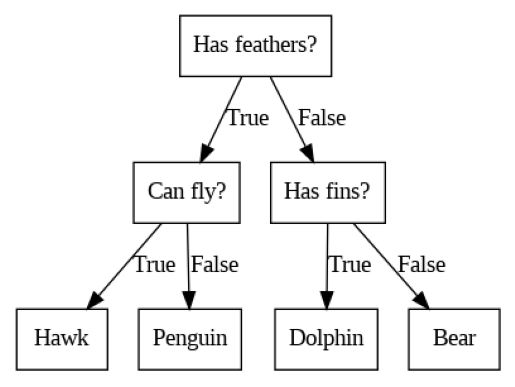

In [65]:
mglearn.plots.plot_animal_tree()